In [87]:
# NO TOUCHY: This cell handles environment setup, connects to the database, and previews available tables.

# Imports & Setup
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv

load_dotenv()

# Database connection setup
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASS = os.getenv("DB_PASS")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")

engine = create_engine(f"postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

In [88]:
# Displays Customer CRM fields.

with open("../queries/customer_crm_fields.sql", "r") as file:
    query = file.read()

df = pd.read_sql(query, engine)
df

,account_id,account_name,industry,segment,region,cs_manager_id,sales_rep_id,initial_contract_date,renewal_date,churn_date,...,support_tickets_last_qtr,feature_adoption_index,expansion_revenue,contract_value_ARR,onboarding_completion_days,primary_use_case,sales_win_reason,churn_reason,product_feedback_flag,csat_score_last_6mo
0,AC1000,"Hunter, Reeves and Ray",Retail,SMB,EMEA,CSM31,SR10,2022-12-05,2023-05-04,None,...,35,0.89,45639.84,190550.88,56,Workflow Automation,Ease of Use,None,False,4.9


In [89]:
# Run my playtime funjam query like a pee pee poo poo man.

with open("../queries/playtime_funjam.sql", "r") as file:
    query = file.read()

df = pd.read_sql(query, engine)
df

,sales,cs,avg_csat_score
0,SR9,CSM22,5.0
1,SR1,CSM12,5.0
2,SR48,CSM18,5.0
3,SR40,CSM24,5.0
4,SR22,CSM40,5.0
5,SR23,CSM27,5.0
6,SR2,CSM35,5.0
7,SR24,CSM16,5.0
8,SR25,CSM17,5.0
9,SR5,CSM27,5.0


/var/folders/6h/phkdxtzj1dl68l0hqvhpt0rr0000gn/T/ipykernel_76995/2980889630.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x="pair", y="avg_csat_score", palette="viridis")


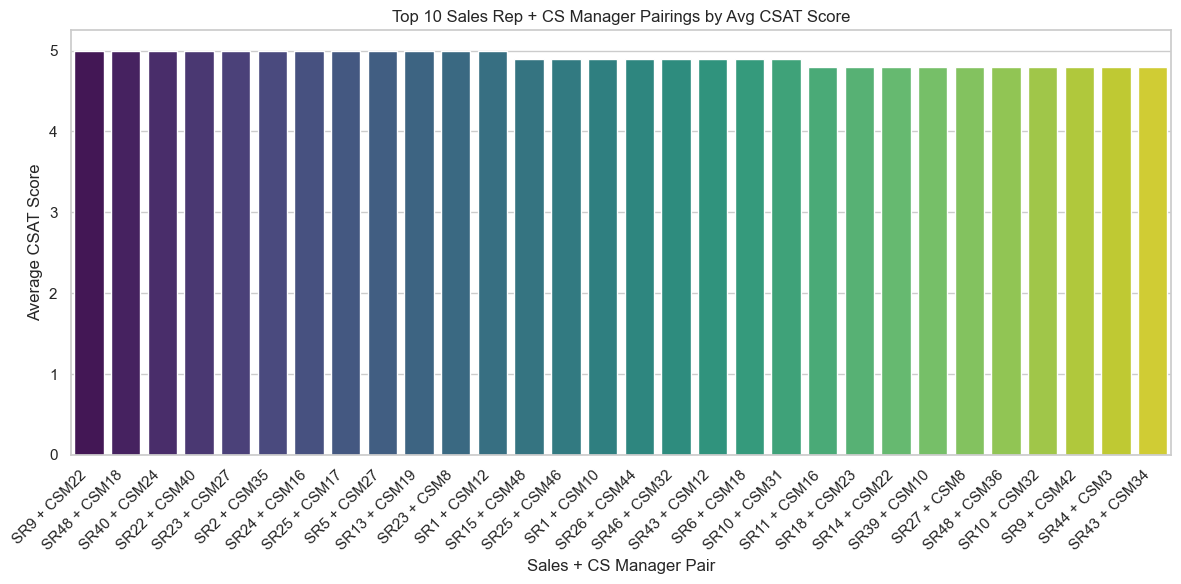

In [90]:
# 📥 Step 1: Load SQL query from file
# This query groups customer CSAT scores by sales rep and CS manager pairs,
# averages them, and returns the top 50 performing pairs
with open("../queries/playtime_funjam.sql") as f:
    query = f.read()

# 🧱 Step 2: Execute SQL query and load results into a pandas DataFrame
# We're using SQLAlchemy to connect and pandas to manage the result set
df = pd.read_sql(query, engine)

# 🧪 Step 3: Create a combined label for each sales + CS manager pair
# This helps us plot the pairings clearly on the X-axis of our bar chart
df["pair"] = df["sales"] + " + " + df["cs"]

# 📊 Step 4: Sort by average CSAT and grab the top 10 pairs
# We're limiting to the top 10 to keep the chart readable
top10 = df.sort_values("avg_csat_score", ascending=False).head(30)

# 🎨 Step 5: Render the bar chart
# We're using seaborn for style and matplotlib for layout control
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x="pair", y="avg_csat_score", palette="viridis")

# 🧼 Step 6: Format the plot for readability
plt.title("Top 10 Sales Rep + CS Manager Pairings by Avg CSAT Score")
plt.xlabel("Sales + CS Manager Pair")
plt.ylabel("Average CSAT Score")
plt.xticks(rotation=45, ha="right")  # Rotate labels to prevent overlap
plt.tight_layout()
plt.show()